In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import font_manager, rc
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN
from sklearn.cluster import KMeans
from kmodes import kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
#from kmodes import kmodes

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#rc('font', family='MHunmin')
fig_size=plt.rcParams["figure.figsize"]
#fig size in inches
fig_size[0]=10
fig_size[1]=8
df = pd.read_csv("C:/Users/suer/Dropbox/job/education2.csv", engine='python')

C:\Users\suer\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\suer\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
score = {1:5,2:4,3:3,4:2,5:1}
colnames = df.columns
scorecol = ['대학만족도', '진로노력', '4트랙필요','외국어프로그램필요성', '외국어참여', '기간제교사']
for x in scorecol:
    df[x] = df[x].map(score)

In [3]:
df.head()

,진학동기,대학만족도,불만족이유,동기1,동기2,동기3,동기4,동기5,교직의사,교직의사변화,...,임용지원2,임용지원3,기간제교사,취창업지원팀,진로교육센터,의견,학과,성별,연령,학년
0,1,4.0,1,4,3,4,4,3,1,1,...,3,7,4.0,2,2,9999,역사교육과,2,19,1
1,1,4.0,1,5,4,4,5,4,1,1,...,1,2,4.0,1,1,9999,역사교육과,2,18,1
2,1,5.0,1,5,4,4,4,5,1,1,...,4,7,4.0,2,2,9999,역사교육과,1,18,1
3,1,5.0,1,5,4,4,5,4,1,1,...,6,4,3.0,2,2,9999,역사교육과,2,19,1
4,1,5.0,6,5,5,5,5,5,1,1,...,1,3,4.0,2,2,9999,역사교육과,1,18,1


In [4]:
df.drop('의견', axis=1, inplace=True)

In [5]:
df.head()

,진학동기,대학만족도,불만족이유,동기1,동기2,동기3,동기4,동기5,교직의사,교직의사변화,...,임용지원1,임용지원2,임용지원3,기간제교사,취창업지원팀,진로교육센터,학과,성별,연령,학년
0,1,4.0,1,4,3,4,4,3,1,1,...,2,3,7,4.0,2,2,역사교육과,2,19,1
1,1,4.0,1,5,4,4,5,4,1,1,...,6,1,2,4.0,1,1,역사교육과,2,18,1
2,1,5.0,1,5,4,4,4,5,1,1,...,2,4,7,4.0,2,2,역사교육과,1,18,1
3,1,5.0,1,5,4,4,5,4,1,1,...,2,6,4,3.0,2,2,역사교육과,2,19,1
4,1,5.0,6,5,5,5,5,5,1,1,...,4,1,3,4.0,2,2,역사교육과,1,18,1


In [6]:
df.describe()

,진학동기,대학만족도,불만족이유,동기1,동기2,동기3,동기4,동기5,교직의사,교직의사변화,...,필요프로그램,임용지원1,임용지원2,임용지원3,기간제교사,취창업지원팀,진로교육센터,성별,연령,학년
count,565.000000,561.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,...,565.000000,565.000000,565.000000,565.000000,558.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,54.869027,4.081996,6956.127434,163.375221,127.879646,127.545133,163.391150,216.053097,72.060177,656.113274,...,108.405310,91.408850,180.800000,181.081416,3.476703,107.812389,160.874336,107.729204,127.097345,91.224779
std,727.184733,0.948898,4603.630937,1252.479419,1106.580901,1106.618519,1252.477379,1442.389364,838.974484,2475.424466,...,1025.598549,937.010665,1319.081362,1319.040324,1.105882,1025.658782,1252.797675,1025.667361,1023.661442,937.027042
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000
25%,1.000000,3.000000,6.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,20.000000,2.000000
50%,1.000000,4.000000,9999.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,21.000000,3.000000
75%,2.000000,5.000000,9999.000000,5.000000,5.000000,4.000000,5.000000,4.000000,1.000000,2.000000,...,3.000000,4.000000,5.000000,6.000000,4.000000,2.000000,2.000000,2.000000,22.000000,4.000000
max,9999.000000,5.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,5.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000


In [7]:
pd.crosstab(df['진학동기'],df['대학만족도'], margins=True)

대학만족도,1.0,2.0,3.0,4.0,5.0,All
진학동기,,,,,,
1,1,25,52,136,183,397
2,0,5,10,9,7,31
3,0,2,16,16,10,44
4,0,4,14,12,9,39
5,2,1,8,14,19,44
6,0,0,2,1,3,6
All,3,37,102,188,231,561


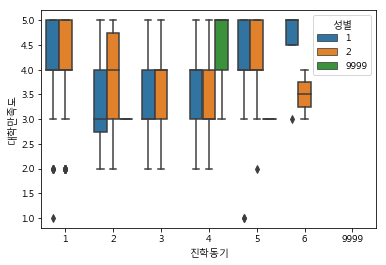

In [8]:
sns.boxplot(x='진학동기',y='대학만족도',data=df, hue='성별')

In [9]:
le = LabelEncoder()
df['학과'] = le.fit_transform(df['학과'])
colnames = df.columns
df = df.replace(9999,np.NaN)
df = KNN(k=3).complete(df)
df = df.astype(int)
df= pd.DataFrame(data=df, columns=colnames)   

Imputing row 1/565 with 1 missing, elapsed time: 0.132
Imputing row 101/565 with 2 missing, elapsed time: 0.135
Imputing row 201/565 with 2 missing, elapsed time: 0.138
Imputing row 301/565 with 1 missing, elapsed time: 0.145
Imputing row 401/565 with 2 missing, elapsed time: 0.148
Imputing row 501/565 with 6 missing, elapsed time: 0.152


In [10]:
df.head()

,진학동기,대학만족도,불만족이유,동기1,동기2,동기3,동기4,동기5,교직의사,교직의사변화,...,임용지원1,임용지원2,임용지원3,기간제교사,취창업지원팀,진로교육센터,학과,성별,연령,학년
0,1,4,1,4,3,4,4,3,1,1,...,2,3,7,4,2,2,5,2,19,1
1,1,4,1,5,4,4,5,4,1,1,...,6,1,2,4,1,1,5,2,18,1
2,1,5,1,5,4,4,4,5,1,1,...,2,4,7,4,2,2,5,1,18,1
3,1,5,1,5,4,4,5,4,1,1,...,2,6,4,3,2,2,5,2,19,1
4,1,5,6,5,5,5,5,5,1,1,...,4,1,3,4,2,2,5,1,18,1


In [11]:
df.describe()

,진학동기,대학만족도,불만족이유,동기1,동기2,동기3,동기4,동기5,교직의사,교직의사변화,...,임용지원1,임용지원2,임용지원3,기간제교사,취창업지원팀,진로교육센터,학과,성별,연령,학년
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,...,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1.785841,4.074336,3.180531,4.159292,4.046018,3.702655,4.178761,3.757522,1.277876,1.368142,...,2.939823,3.874336,4.180531,3.469027,1.640708,1.615929,5.099115,1.559292,21.132743,2.757522
std,1.374209,0.949877,1.465675,0.916422,0.861719,1.003580,0.898132,0.912658,0.640497,0.826668,...,1.798322,3.506346,1.936760,1.106643,0.586587,0.558075,3.653049,0.496912,2.295943,1.139071
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,17.000000,1.000000
25%,1.000000,3.000000,2.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,20.000000,2.000000
50%,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,5.000000,2.000000,21.000000,3.000000
75%,2.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,...,4.000000,5.000000,6.000000,4.000000,2.000000,2.000000,8.000000,2.000000,22.000000,4.000000
max,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,7.000000,...,12.000000,77.000000,9.000000,5.000000,4.000000,3.000000,11.000000,2.000000,49.000000,5.000000


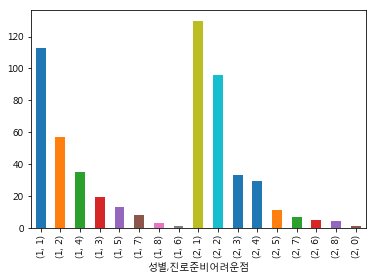

In [14]:
df.groupby('성별')['진로준비어려운점'].value_counts().plot(kind='bar')

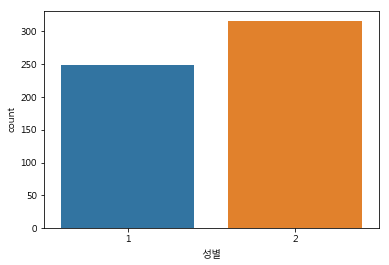

In [67]:
sns.countplot(x='성별',data=df)

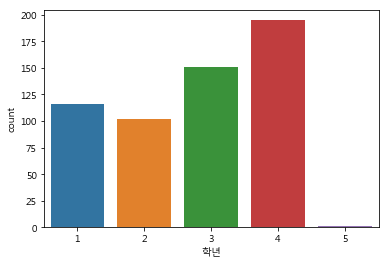

In [68]:
sns.countplot(x='학년',data=df)

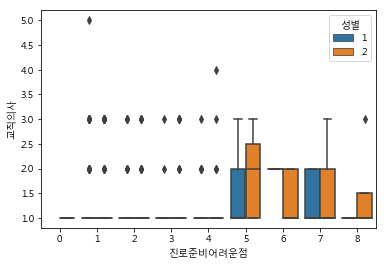

In [69]:
sns.boxplot(x='진로준비어려운점', y= '교직의사',data=df,hue='성별')

In [76]:
df['학년'].value_counts()

4    195
3    151
1    116
2    102
5      1
Name: 학년, dtype: int64

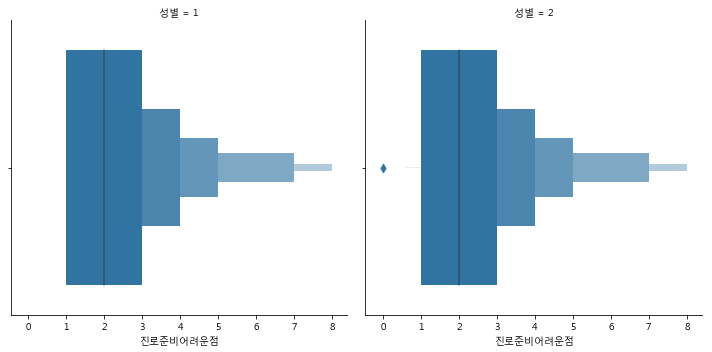

In [85]:
sns.catplot(x='진로준비어려운점', col='성별',kind='boxen', data=df)

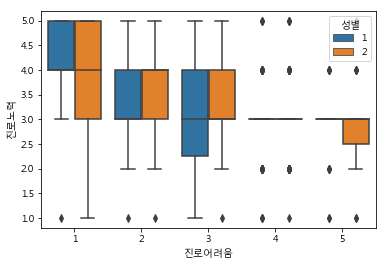

In [16]:
sns.boxplot(x='진로어려움', y= '진로노력',data=df,hue='성별')

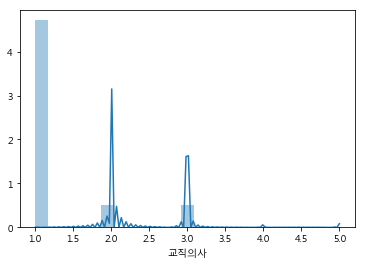

In [17]:
sns.distplot(df['교직의사'])

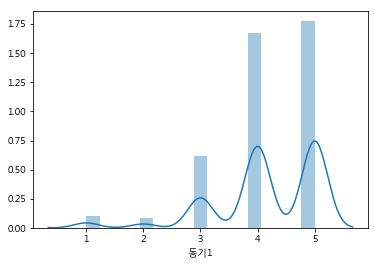

In [18]:
sns.distplot(df['동기1'])

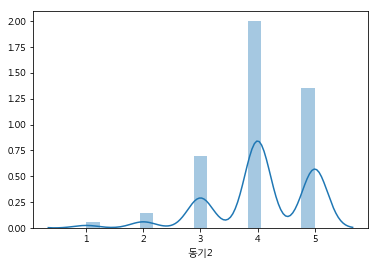

In [19]:
sns.distplot(df['동기2'])

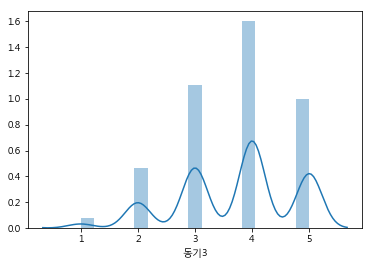

In [20]:
sns.distplot(df['동기3'])

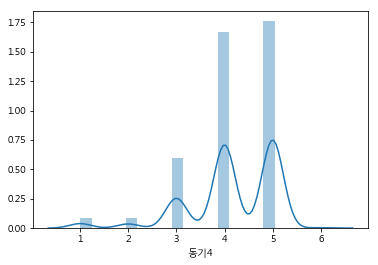

In [21]:
sns.distplot(df['동기4'])

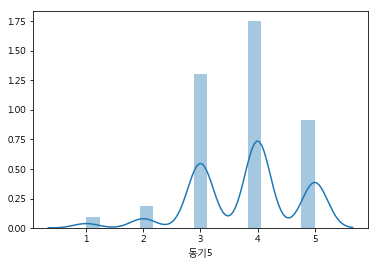

In [22]:
sns.distplot(df['동기5'])

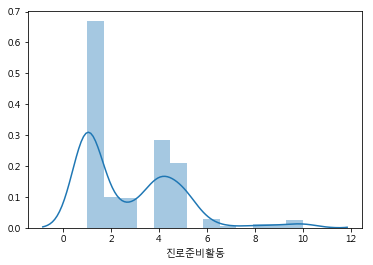

In [23]:
sns.distplot(df['진로준비활동'])

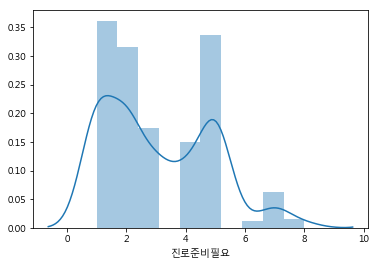

In [24]:
sns.distplot(df['진로준비필요'],bins=10)

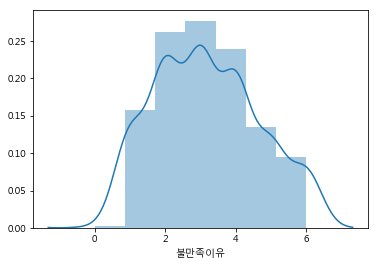

In [26]:
sns.distplot(df['불만족이유'],bins=7)

In [27]:
df.groupby('불만족이유')['대학만족도'].mean()

불만족이유
0    5.000000
1    4.210526
2    4.094488
3    4.089552
4    4.146552
5    3.953846
6    3.717391
Name: 대학만족도, dtype: float64

In [28]:
pd.crosstab(df['불만족이유'],df['대학만족도'],normalize='index')

대학만족도,1,2,3,4,5
불만족이유,,,,,
0,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.052632,0.157895,0.315789,0.473684
2,0.000000,0.039370,0.181102,0.425197,0.354331
3,0.000000,0.044776,0.238806,0.298507,0.417910
4,0.008621,0.086207,0.146552,0.267241,0.491379
5,0.015385,0.061538,0.215385,0.369231,0.338462
6,0.021739,0.173913,0.173913,0.326087,0.304348


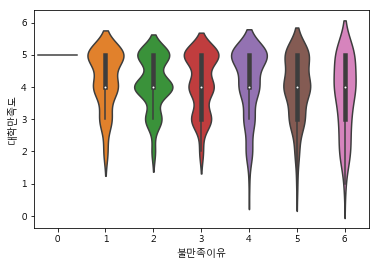

In [87]:
sns.violinplot(df['불만족이유'],df['대학만족도'])

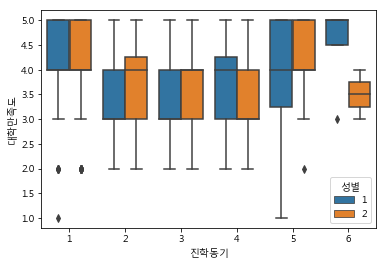

In [30]:
sns.boxplot(x='진학동기',y='대학만족도',data=df, hue='성별')

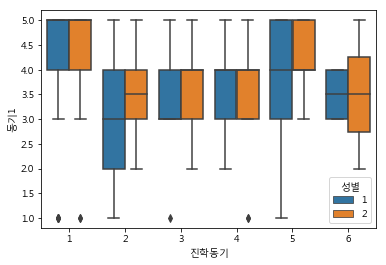

In [31]:
sns.boxplot(x='진학동기',y='동기1',data=df, hue='성별')

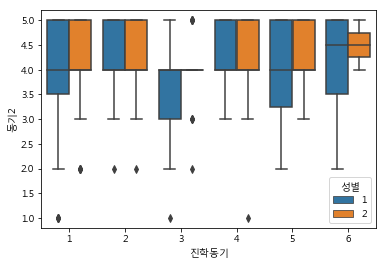

In [32]:
sns.boxplot(x='진학동기',y='동기2',data=df, hue='성별')

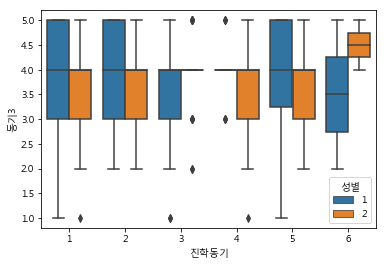

In [33]:
sns.boxplot(x='진학동기',y='동기3',data=df, hue='성별')

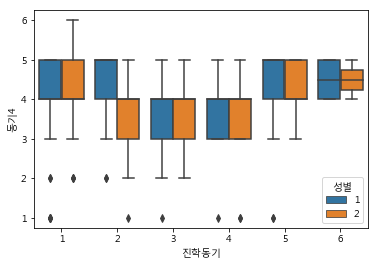

In [34]:
sns.boxplot(x='진학동기',y='동기4',data=df, hue='성별')

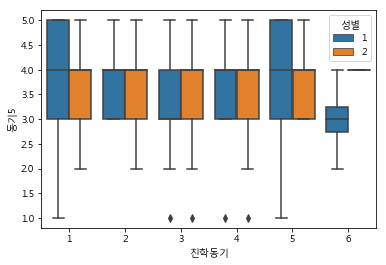

In [35]:
sns.boxplot(x='진학동기',y='동기5',data=df, hue='성별')

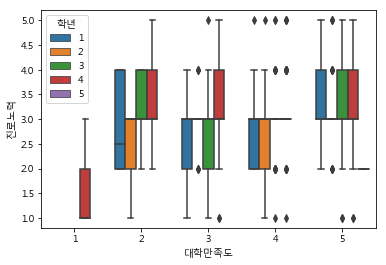

In [36]:
sns.boxplot(x='대학만족도',y='진로노력',data=df, hue='학년')

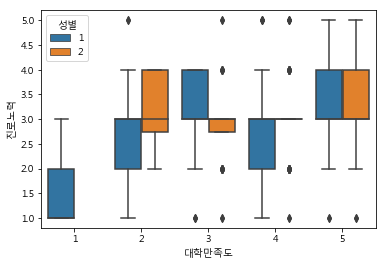

In [37]:
sns.boxplot(x='대학만족도',y='진로노력',data=df, hue='성별')

In [39]:
df['성별'].value_counts()

2    316
1    249
Name: 성별, dtype: int64

In [40]:
X2 = np.array(df.astype(float))

In [41]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.18939737436434315
For n_clusters = 3 The average silhouette_score is : 0.15403468235664206
For n_clusters = 4 The average silhouette_score is : 0.14893285516079469
For n_clusters = 5 The average silhouette_score is : 0.11660112216847357
For n_clusters = 6 The average silhouette_score is : 0.12084918843595546


In [52]:
clf = KMeans(n_clusters=4)
clf.fit(X2)
df['cluster'] = clf.fit_predict(X2)

ms = MeanShift()
ms.fit(X2)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("number of estimated clusters " , n_clusters_)

number of estimated clusters  4


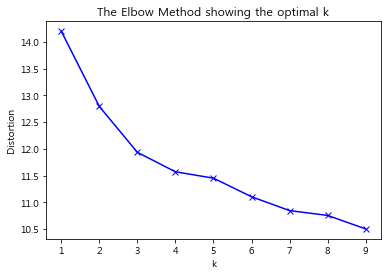

In [55]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(X2)
    kmeanModel.fit(X2)
    distortions.append(sum(np.min(cdist(X2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X2.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
xx = df.columns
i = 0
for x in df.columns:
    print(i+1, x)
    i=i+1

1 진학동기
2 대학만족도
3 불만족이유
4 동기1
5 동기2
6 동기3
7 동기4
8 동기5
9 교직의사
10 교직의사변화
11 교직진출이유
12 교직비진출이유
13 진로영향
14 진로준비시기
15 진로어려움
16 진로노력
17 진로준비활동
18 진로준비필요
19 진로준비어려운점
20 졸업후취업
21 진로희망1
22 진로희망2
23 진로희망3
24 진로선택기준
25 4트랙필요
26 4트랙시기
27 4트랙선택방법
28 4트랙선택
29 참여프로그램1
30 참여프로그램2
31 참여프로그램3
32 외국어프로그램필요성
33 외국어참여
34 필요프로그램
35 임용지원1
36 임용지원2
37 임용지원3
38 기간제교사
39 취창업지원팀
40 진로교육센터
41 학과
42 성별
43 연령
44 학년
45 cluster
46 label


In [57]:
df.iloc[:,44].values

array([0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 0, 3, 2, 0, 0, 0, 1, 2, 3,
       3, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 3, 0, 0, 2, 2, 1, 1, 3, 2, 0, 3, 2, 1, 2, 2, 0, 2,
       0, 0, 0, 1, 2, 1, 0, 0, 3, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 0, 2, 3, 2, 2, 2, 0, 2, 3, 0, 3, 0, 2, 1, 3, 3, 2,
       2, 0, 1, 2, 3, 0, 0, 0, 1, 0, 2, 2, 2, 2, 3, 3, 0, 2, 1, 0, 1, 2,
       3, 0, 0, 0, 3, 3, 2, 1, 1, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2,
       2, 2, 0, 1, 2, 3, 3, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 3, 0, 3,
       2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 3, 3, 3, 3, 1, 2, 3,
       1, 1, 1, 2, 3, 0, 0, 3, 2, 3, 2, 2, 3, 3, 1, 1, 3, 3, 0, 0, 0, 2,
       3, 1, 0, 0, 3, 3, 0, 0, 0, 2, 2, 0, 2, 2, 1,

In [58]:
x2 = df.values
x2 = StandardScaler().fit_transform(x2)
pca2 = PCA(n_components=2)
pca2.fit(x2)
print(pca2.explained_variance_ratio_) 
print(pca2.singular_values_)

[0.08018994 0.05770866]
[45.65234524 38.72787343]


C:\Users\suer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Users\suer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


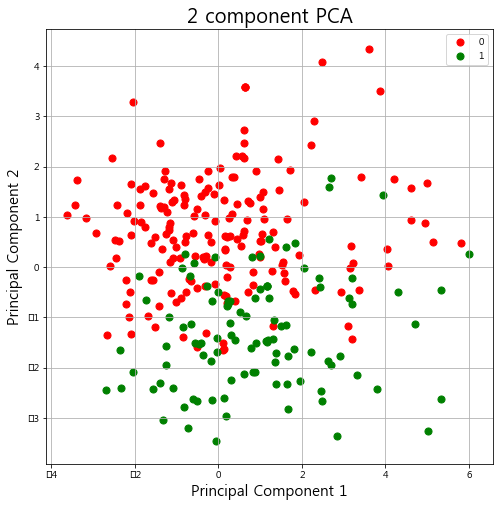

In [59]:
x2 = df.values
x2 = StandardScaler().fit_transform(x2)
pca2 = PCA(n_components=2)
pCom = pca2.fit_transform(x2)
pDf2 = pd.DataFrame(data = pCom, columns=['Principal Component 1', 'Principal Component 2'])
target = pd.DataFrame(data=df.iloc[:,44].values, columns=['target'])
#target = np.rint(target)
fDf2 = pd.concat([pDf2, target], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Cluster 1', 'Cluster 2']
colors = ['r', 'g']
targets = [0, 1, 2, 3]
for target, color in zip(targets,colors):
    indicesToKeep = fDf2['target'] == target
    ax.scatter(fDf2.loc[indicesToKeep, 'Principal Component 1']
               , fDf2.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [60]:
print(pca2.explained_variance_ratio_) 
print(pca2.singular_values_)

[0.08018998 0.05770944]
[45.65235677 38.7281341 ]


In [62]:
""" 
X3 = df.as_matrix()
kp = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)
#kp.fit_predict(data, categorical=[4])
kp.fit_predict(X3, categorical=[2])
lbl = kp.labels_
#lbl = pd.Series(lbl)
df['label'] = lbl
print(kp.cluster_centroids_)
print(kp.labels_)
"""

" \nX3 = df.as_matrix()\nkp = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)\n#kp.fit_predict(data, categorical=[4])\nkp.fit_predict(X3, categorical=[2])\nlbl = kp.labels_\n#lbl = pd.Series(lbl)\ndf['label'] = lbl\nprint(kp.cluster_centroids_)\nprint(kp.labels_)\n"

In [65]:
"""
X = np.array(df.astype(float))
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    clusterer = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=1, verbose=True)
    cluster_labels = clusterer.fit_predict(X,categorical=[n_clusters])
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
"""    

'\nX = np.array(df.astype(float))\nrange_n_clusters = [2, 3, 4, 5, 6]\nfor n_clusters in range_n_clusters:\n    clusterer = KPrototypes(n_clusters=n_clusters, init=\'Huang\', n_init=1, verbose=True)\n    cluster_labels = clusterer.fit_predict(X,categorical=[n_clusters])\n    # The silhouette_score gives the average value for all the samples.\n    # This gives a perspective into the density and separation of the formed\n    # clusters\n    silhouette_avg = silhouette_score(X, cluster_labels)\n    print("For n_clusters =", n_clusters,\n          "The average silhouette_score is :", silhouette_avg)\n    # Compute the silhouette scores for each sample\n    sample_silhouette_values = silhouette_samples(X, cluster_labels)\n'

In [64]:
pd.crosstab(df['cluster'], [df['동기1'], df['졸업후취업']],normalize='index')

동기1             1                             2                                \
졸업후취업          1         2         3         1         2         3         4    
cluster                                                                         
0        0.010870  0.016304  0.000000  0.021739  0.005435  0.000000  0.000000   
1        0.019417  0.009709  0.000000  0.009709  0.000000  0.009709  0.000000   
2        0.010101  0.010101  0.005051  0.000000  0.010101  0.000000  0.005051   
3        0.000000  0.000000  0.012500  0.012500  0.000000  0.000000  0.000000   

동기1             3                                       4                      \
졸업후취업          1         2         3         4         1         2         3    
cluster                                                                         
0        0.054348  0.043478  0.027174  0.010870  0.108696  0.195652  0.086957   
1        0.019417  0.067961  0.038835  0.009709  0.135922  0.174757  0.165049   
2        0.050505  0.085859  0.020202  0.000000  0.111111  0.191919  0.035354   
3        0.087500  0.012500  0.012500  0.037500  0.150000  0.162500  0.050000   

동기1                       5                                          
졸업후취업          4         1         2         3         4         11  
cluster                                                              
0        0.005435  0.141304  0.217391  0.054348  0.000000  0.000000  
1        0.000000  0.135922  0.145631  0.058252  0.000000  0.000000  
2        0.015152  0.171717  0.217172  0.035354  0.020202  0.005051  
3        0.012500  0.237500  0.162500  0.050000  0.000000  0.000000